In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
#cargo primero los datos
file_dir = 'Datos/arg.txt'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df) #el original
df = df[:-20] #saco los ultimos 20 dias (ult 10 para probar + ult 10 retrasados)
df1 = df1[:-10] #saco los ultimos 10 dias retrasados

In [4]:
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
df += np.random.normal(0,0.02,df.shape)
df = df.reshape(-1,1)
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [5]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [6]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=100,activation='relu',return_sequences=True,input_shape=(lag,1),recurrent_dropout=0.2))
model.add(keras.layers.LSTM(units=100,activation='relu',recurrent_dropout=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=300,validation_data=(x_test,y_test),batch_size=8,verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
Train on 234 samples, validate on 56 samples
Epoch 1/500
 - 1s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.3702 - val_mse: 0.3702
Epoch 2/500
 - 0s - loss: 0.0089 - mse: 0.0089 - val_loss: 0.2026 - val_mse: 0.2026
Epoch 3/500
 - 0s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 4/500
 - 0s - loss: 6.7019e-04 - mse: 6.7019e-04 - val_loss: 0.0010 - val_m

 - 0s - loss: 4.4369e-04 - mse: 4.4369e-04 - val_loss: 6.0008e-04 - val_mse: 6.0008e-04
Epoch 79/500
 - 0s - loss: 4.6180e-04 - mse: 4.6180e-04 - val_loss: 6.8260e-04 - val_mse: 6.8260e-04
Epoch 80/500
 - 0s - loss: 4.3763e-04 - mse: 4.3763e-04 - val_loss: 8.5864e-04 - val_mse: 8.5864e-04
Epoch 81/500
 - 0s - loss: 4.6544e-04 - mse: 4.6544e-04 - val_loss: 6.2873e-04 - val_mse: 6.2873e-04
Epoch 82/500
 - 0s - loss: 4.8027e-04 - mse: 4.8027e-04 - val_loss: 5.6754e-04 - val_mse: 5.6754e-04
Epoch 83/500
 - 0s - loss: 4.4069e-04 - mse: 4.4069e-04 - val_loss: 5.9504e-04 - val_mse: 5.9504e-04
Epoch 84/500
 - 0s - loss: 4.2768e-04 - mse: 4.2768e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 85/500
 - 0s - loss: 4.4558e-04 - mse: 4.4558e-04 - val_loss: 9.8348e-04 - val_mse: 9.8348e-04
Epoch 86/500
 - 0s - loss: 4.4706e-04 - mse: 4.4706e-04 - val_loss: 5.8998e-04 - val_mse: 5.8998e-04
Epoch 87/500
 - 0s - loss: 4.3359e-04 - mse: 4.3359e-04 - val_loss: 9.9875e-04 - val_mse: 9.9875e-04
Epoch 88/50

 - 0s - loss: 4.2998e-04 - mse: 4.2998e-04 - val_loss: 8.4120e-04 - val_mse: 8.4120e-04
Epoch 162/500
 - 0s - loss: 4.8658e-04 - mse: 4.8658e-04 - val_loss: 7.7566e-04 - val_mse: 7.7566e-04
Epoch 163/500
 - 0s - loss: 4.7795e-04 - mse: 4.7795e-04 - val_loss: 7.9781e-04 - val_mse: 7.9781e-04
Epoch 164/500
 - 0s - loss: 4.4598e-04 - mse: 4.4598e-04 - val_loss: 9.5221e-04 - val_mse: 9.5221e-04
Epoch 165/500
 - 0s - loss: 4.0853e-04 - mse: 4.0853e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 166/500
 - 0s - loss: 4.1683e-04 - mse: 4.1683e-04 - val_loss: 8.6480e-04 - val_mse: 8.6480e-04
Epoch 167/500
 - 0s - loss: 4.0622e-04 - mse: 4.0622e-04 - val_loss: 7.7877e-04 - val_mse: 7.7877e-04
Epoch 168/500
 - 0s - loss: 4.1945e-04 - mse: 4.1945e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 169/500
 - 0s - loss: 4.1716e-04 - mse: 4.1716e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 170/500
 - 0s - loss: 4.0439e-04 - mse: 4.0439e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 171/500
 - 0s - loss

Epoch 245/500
 - 0s - loss: 4.1815e-04 - mse: 4.1815e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 246/500
 - 0s - loss: 4.1638e-04 - mse: 4.1638e-04 - val_loss: 7.9470e-04 - val_mse: 7.9470e-04
Epoch 247/500
 - 0s - loss: 4.2146e-04 - mse: 4.2146e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 248/500
 - 0s - loss: 4.3697e-04 - mse: 4.3697e-04 - val_loss: 9.3291e-04 - val_mse: 9.3291e-04
Epoch 249/500
 - 0s - loss: 4.2352e-04 - mse: 4.2352e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 250/500
 - 0s - loss: 4.3972e-04 - mse: 4.3972e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 251/500
 - 0s - loss: 4.2467e-04 - mse: 4.2467e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 252/500
 - 0s - loss: 4.3933e-04 - mse: 4.3933e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 253/500
 - 0s - loss: 4.0260e-04 - mse: 4.0260e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 254/500
 - 0s - loss: 4.6763e-04 - mse: 4.6763e-04 - val_loss: 8.2716e-04 - val_mse: 8.2716e-04
Epoch 255/500
 - 0s - loss: 4.3311e-

Epoch 329/500
 - 0s - loss: 4.4849e-04 - mse: 4.4849e-04 - val_loss: 5.4335e-04 - val_mse: 5.4335e-04
Epoch 330/500
 - 0s - loss: 4.1416e-04 - mse: 4.1416e-04 - val_loss: 7.8782e-04 - val_mse: 7.8782e-04
Epoch 331/500
 - 0s - loss: 4.0274e-04 - mse: 4.0274e-04 - val_loss: 6.3159e-04 - val_mse: 6.3159e-04
Epoch 332/500
 - 0s - loss: 4.1166e-04 - mse: 4.1166e-04 - val_loss: 5.3151e-04 - val_mse: 5.3151e-04
Epoch 333/500
 - 0s - loss: 4.1272e-04 - mse: 4.1272e-04 - val_loss: 6.1043e-04 - val_mse: 6.1043e-04
Epoch 334/500
 - 0s - loss: 4.2481e-04 - mse: 4.2481e-04 - val_loss: 5.3789e-04 - val_mse: 5.3789e-04
Epoch 335/500
 - 0s - loss: 4.2927e-04 - mse: 4.2927e-04 - val_loss: 5.6729e-04 - val_mse: 5.6729e-04
Epoch 336/500
 - 0s - loss: 4.3684e-04 - mse: 4.3684e-04 - val_loss: 5.8799e-04 - val_mse: 5.8799e-04
Epoch 337/500
 - 0s - loss: 4.4065e-04 - mse: 4.4065e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 338/500
 - 0s - loss: 4.2945e-04 - mse: 4.2945e-04 - val_loss: 4.9410e-04 - val_mse:

Epoch 411/500
 - 0s - loss: 4.4525e-04 - mse: 4.4525e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 412/500
 - 0s - loss: 4.6277e-04 - mse: 4.6277e-04 - val_loss: 9.5427e-04 - val_mse: 9.5427e-04
Epoch 413/500
 - 0s - loss: 4.2401e-04 - mse: 4.2401e-04 - val_loss: 5.7960e-04 - val_mse: 5.7960e-04
Epoch 414/500
 - 0s - loss: 4.1770e-04 - mse: 4.1770e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 415/500
 - 0s - loss: 4.3946e-04 - mse: 4.3946e-04 - val_loss: 5.2750e-04 - val_mse: 5.2750e-04
Epoch 416/500
 - 0s - loss: 3.9533e-04 - mse: 3.9533e-04 - val_loss: 9.5995e-04 - val_mse: 9.5995e-04
Epoch 417/500
 - 0s - loss: 4.1520e-04 - mse: 4.1520e-04 - val_loss: 4.7282e-04 - val_mse: 4.7282e-04
Epoch 418/500
 - 0s - loss: 4.0640e-04 - mse: 4.0640e-04 - val_loss: 6.1882e-04 - val_mse: 6.1882e-04
Epoch 419/500
 - 0s - loss: 4.2654e-04 - mse: 4.2654e-04 - val_loss: 6.5470e-04 - val_mse: 6.5470e-04
Epoch 420/500
 - 0s - loss: 4.3244e-04 - mse: 4.3244e-04 - val_loss: 5.9655e-04 - val_mse: 5.9655e

Epoch 493/500
 - 0s - loss: 3.9112e-04 - mse: 3.9112e-04 - val_loss: 6.3641e-04 - val_mse: 6.3641e-04
Epoch 494/500
 - 0s - loss: 4.0660e-04 - mse: 4.0660e-04 - val_loss: 4.3703e-04 - val_mse: 4.3703e-04
Epoch 495/500
 - 0s - loss: 3.9473e-04 - mse: 3.9473e-04 - val_loss: 9.9659e-04 - val_mse: 9.9659e-04
Epoch 496/500
 - 0s - loss: 4.1160e-04 - mse: 4.1160e-04 - val_loss: 8.2930e-04 - val_mse: 8.2930e-04
Epoch 497/500
 - 0s - loss: 4.0414e-04 - mse: 4.0414e-04 - val_loss: 5.5462e-04 - val_mse: 5.5462e-04
Epoch 498/500
 - 0s - loss: 3.9536e-04 - mse: 3.9536e-04 - val_loss: 5.7103e-04 - val_mse: 5.7103e-04
Epoch 499/500
 - 0s - loss: 3.9012e-04 - mse: 3.9012e-04 - val_loss: 4.8013e-04 - val_mse: 4.8013e-04
Epoch 500/500
 - 0s - loss: 3.8642e-04 - mse: 3.8642e-04 - val_loss: 0.0014 - val_mse: 0.0014


In [7]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [8]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [9]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict)))
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 371157.1005528442
test mse squared: 1984198.378081048


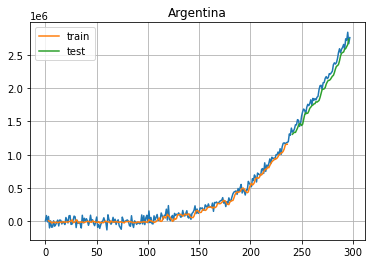

In [10]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Argentina')
plt.legend()
plt.show()

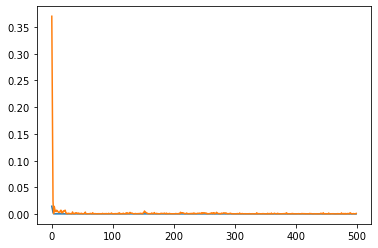

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# aca hacemos el forecast

In [12]:
n = len(test_data)
x_input=test_data[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, lag, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, lag,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[0.9654471]]
2 day output [[0.96964824]]
3 day output [[0.9621047]]
4 day output [[0.95726883]]
5 day output [[0.95438194]]
6 day output [[0.9488758]]
7 day output [[0.9444107]]
8 day output [[0.9398903]]
9 day output [[0.93483156]]


In [13]:
scaler.inverse_transform(lst_output)

array([[2732499.1655218 ],
       [2698477.30558652],
       [2710219.59195888],
       [2689135.02173221],
       [2675618.63937104],
       [2667549.65964317],
       [2652159.7226299 ],
       [2639679.57625806],
       [2627044.99407238],
       [2612905.5373382 ]])

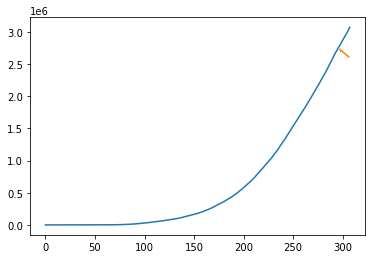

In [14]:
plt.plot(df1)
dias_forecast = np.arange(0,10) + len(df) - 1
plt.plot(dias_forecast,scaler.inverse_transform(lst_output))
#plt.xlim(290,310)

(290.0, 310.0)

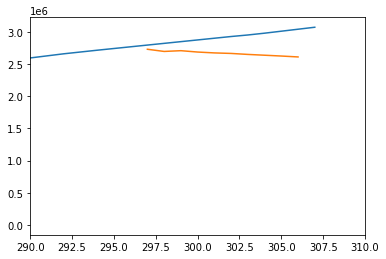

In [15]:
plt.plot(df1)
dias_forecast = np.arange(0,10) + len(df) - 1
plt.plot(dias_forecast,scaler.inverse_transform(lst_output))
plt.xlim(290,310)